In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (8,8)
cmap_train, cmap_test = "bone", "plasma"

## Classification

In [9]:
df = pd.read_csv('data/processed.csv')
X_train, X_test, y_train, y_test = train_test_split(df.readme, df.language,
                    test_size=.22, random_state=0, stratify=df.language)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   repo       701 non-null    object
 1   language   701 non-null    object
 2   readme     701 non-null    object
 3   words      701 non-null    int64 
 4   lang_freq  701 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 27.5+ KB
None


In [10]:
df.language.value_counts()

Go            106
Python        102
Java          102
C++           100
Swift         100
JavaScript     97
C              94
Name: language, dtype: int64

### Dummy (baseline)

              precision    recall  f1-score   support

           C       0.11      0.12      0.12        73
         C++       0.13      0.12      0.12        78
          Go       0.21      0.22      0.22        83
        Java       0.14      0.13      0.13        79
  JavaScript       0.19      0.17      0.18        76
      Python       0.11      0.13      0.12        79
       Swift       0.18      0.19      0.19        78

    accuracy                           0.15       546
   macro avg       0.15      0.15      0.15       546
weighted avg       0.16      0.15      0.15       546



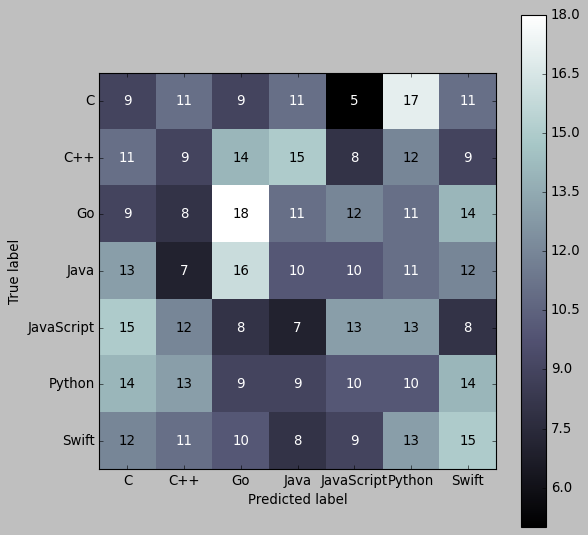

In [61]:
clf = DummyClassifier(strategy='stratified', random_state=2)
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))
plot_confusion_matrix(clf, X_train, y_train, values_format='.0f', cmap=cmap_train)   

In [91]:
def report_and_conf_matrix(clf, X, y, cmap=cmap_train):
    scores = cross_val_score(estimator=clf, X=X, y=y)
    print("-------MAXIMIZE THIS-------\nCross-validation mean accuracy: %0.3f (stdev %0.3f)\n---------------------------" % (scores.mean(), scores.std()))
    print(np.round(scores,3))
    print(classification_report(y, clf.predict(X)))
    plot_confusion_matrix(clf, X, y, values_format='.0f', cmap=cmap)

### Naive Bayes

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.535 (stdev 0.020)
---------------------------
[0.509 0.541 0.523 0.532 0.569]
              precision    recall  f1-score   support

           C       0.92      0.99      0.95        73
         C++       1.00      0.92      0.96        78
          Go       0.99      1.00      0.99        83
        Java       0.98      1.00      0.99        79
  JavaScript       0.97      0.97      0.97        76
      Python       1.00      0.99      0.99        79
       Swift       1.00      0.99      0.99        78

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546



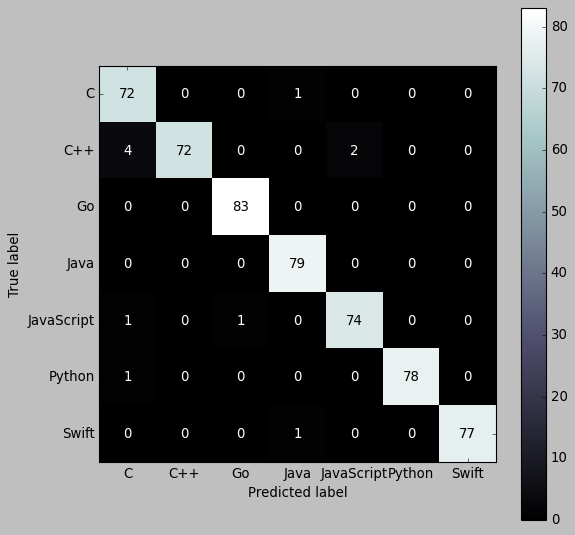

In [92]:
nb_clf = GaussianNB()
nb_vec = TfidfVectorizer(max_features=800)
X = nb_vec.fit_transform(X_train)
nb_clf.fit(X.todense(), y_train)

report_and_conf_matrix(nb_clf, X=X.todense(), y=y_train)

### Logistic regression

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.723 (stdev 0.038)
---------------------------
[0.782 0.706 0.688 0.752 0.688]
              precision    recall  f1-score   support

           C       0.99      0.99      0.99        73
         C++       0.96      0.97      0.97        78
          Go       1.00      0.99      0.99        83
        Java       0.97      0.99      0.98        79
  JavaScript       0.99      0.97      0.98        76
      Python       0.99      0.99      0.99        79
       Swift       1.00      1.00      1.00        78

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



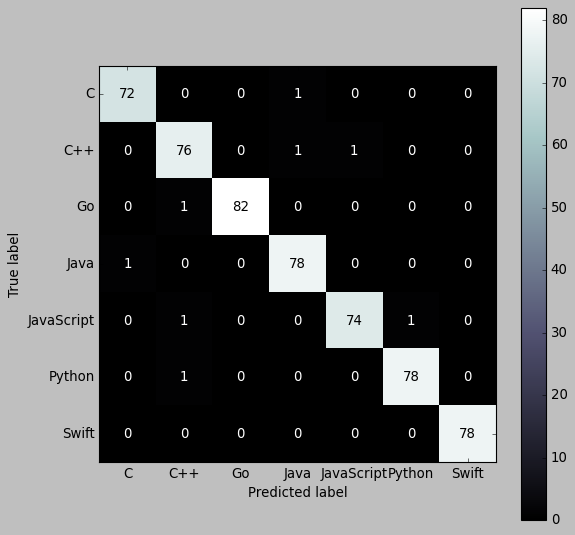

In [93]:
lr_clf = LogisticRegression(C=3)
lr_vec = TfidfVectorizer(max_features=900)
X = lr_vec.fit_transform(X_train)
lr_clf.fit(X, y_train)

report_and_conf_matrix(lr_clf, X=X, y=y_train)

### kNN

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.623 (stdev 0.023)
---------------------------
[0.618 0.606 0.633 0.661 0.596]
              precision    recall  f1-score   support

           C       0.67      0.45      0.54        73
         C++       0.52      0.56      0.54        78
          Go       0.67      0.83      0.74        83
        Java       0.77      0.91      0.83        79
  JavaScript       0.78      0.66      0.71        76
      Python       0.72      0.73      0.73        79
       Swift       0.93      0.85      0.89        78

    accuracy                           0.72       546
   macro avg       0.72      0.71      0.71       546
weighted avg       0.72      0.72      0.71       546



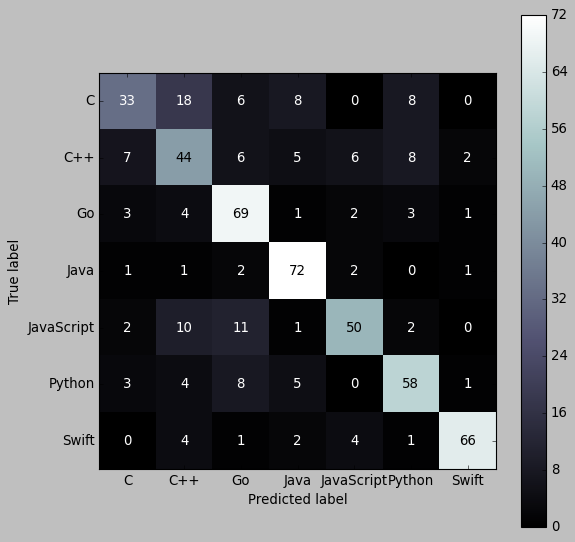

In [94]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_vec = TfidfVectorizer(max_features=1200)
X = knn_vec.fit_transform(X_train)
knn_clf.fit(X, y_train)

report_and_conf_matrix(knn_clf, X=X, y=y_train)

### Random forest

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.775 (stdev 0.029)
---------------------------
[0.782 0.78  0.771 0.817 0.725]
              precision    recall  f1-score   support

           C       0.99      1.00      0.99        73
         C++       1.00      1.00      1.00        78
          Go       1.00      1.00      1.00        83
        Java       1.00      1.00      1.00        79
  JavaScript       1.00      1.00      1.00        76
      Python       1.00      0.99      0.99        79
       Swift       1.00      1.00      1.00        78

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



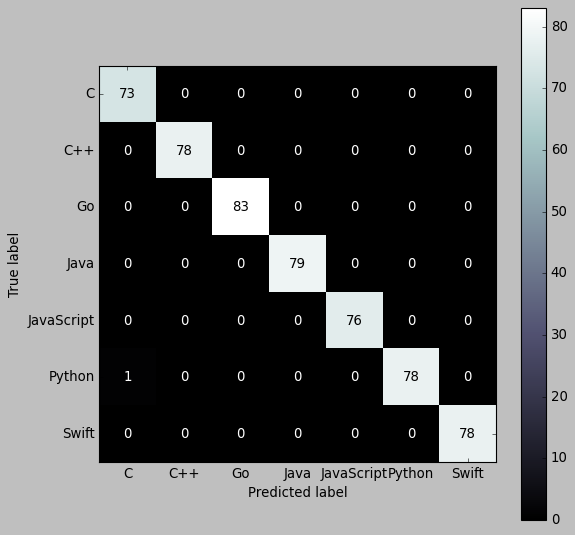

In [95]:
rf_clf = RandomForestClassifier(n_estimators=125,
                                max_depth=20,
                                random_state=36)
rf_vec = TfidfVectorizer(min_df=15, max_df=.35)
X = rf_vec.fit_transform(X_train)
rf_clf.fit(X, y_train)

report_and_conf_matrix(rf_clf, X=X, y=y_train)

In [85]:
eli5.explain_weights(rf_clf, feature_names=list(rf_vec.vocabulary_.keys()))

Weight,Feature
0.0253 ± 0.0681,core
0.0203 ± 0.0703,rout
0.0201 ± 0.0635,account
0.0164 ± 0.0614,boolean
0.0162 ± 0.0708,social
0.0158 ± 0.0522,proper
0.0148 ± 0.0484,round
0.0133 ± 0.0550,line
0.0132 ± 0.0472,mark
0.0125 ± 0.0467,dictionari


### Test set

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.677 (stdev 0.068)
---------------------------
[0.71  0.71  0.742 0.677 0.548]
              precision    recall  f1-score   support

           C       0.57      0.57      0.57        21
         C++       0.67      0.45      0.54        22
          Go       0.91      0.87      0.89        23
        Java       0.71      0.87      0.78        23
  JavaScript       0.86      0.86      0.86        21
      Python       0.62      0.70      0.65        23
       Swift       0.95      0.95      0.95        22

    accuracy                           0.75       155
   macro avg       0.76      0.75      0.75       155
weighted avg       0.76      0.75      0.75       155



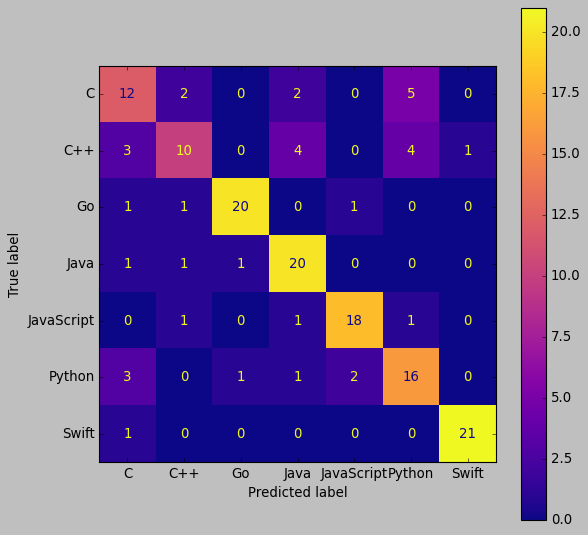

In [98]:
X = TfidfVectorizer(vocabulary=rf_vec.vocabulary_).fit_transform(X_test)
report_and_conf_matrix(rf_clf, X=X, y=y_test, cmap=cmap_test)

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.129 (stdev 0.054)
---------------------------
[0.129 0.161 0.129 0.032 0.194]
              precision    recall  f1-score   support

           C       0.17      0.19      0.18        21
         C++       0.08      0.09      0.09        22
          Go       0.23      0.13      0.17        23
        Java       0.00      0.00      0.00        23
  JavaScript       0.20      0.24      0.22        21
      Python       0.07      0.09      0.08        23
       Swift       0.14      0.14      0.14        22

    accuracy                           0.12       155
   macro avg       0.13      0.12      0.12       155
weighted avg       0.13      0.12      0.12       155



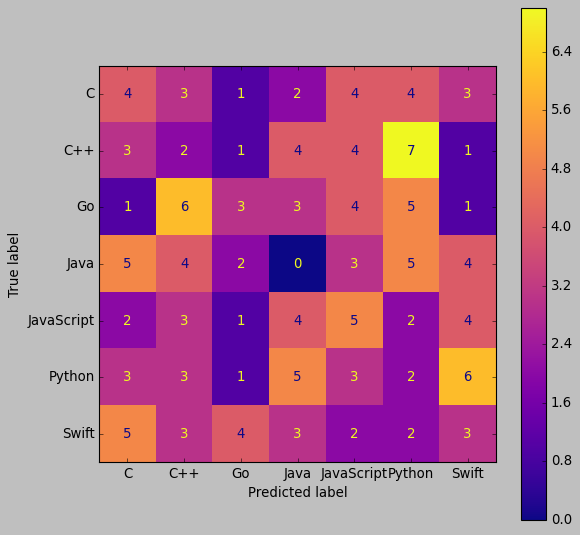

In [99]:
#dummy classifier
report_and_conf_matrix(clf, X=X, y=y_test, cmap=cmap_test)